In [1]:
#pick up the region with the maximum size in the Double Overlapped area
import cv2
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation
from scipy.spatial import distance_matrix
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1 import AxesGrid

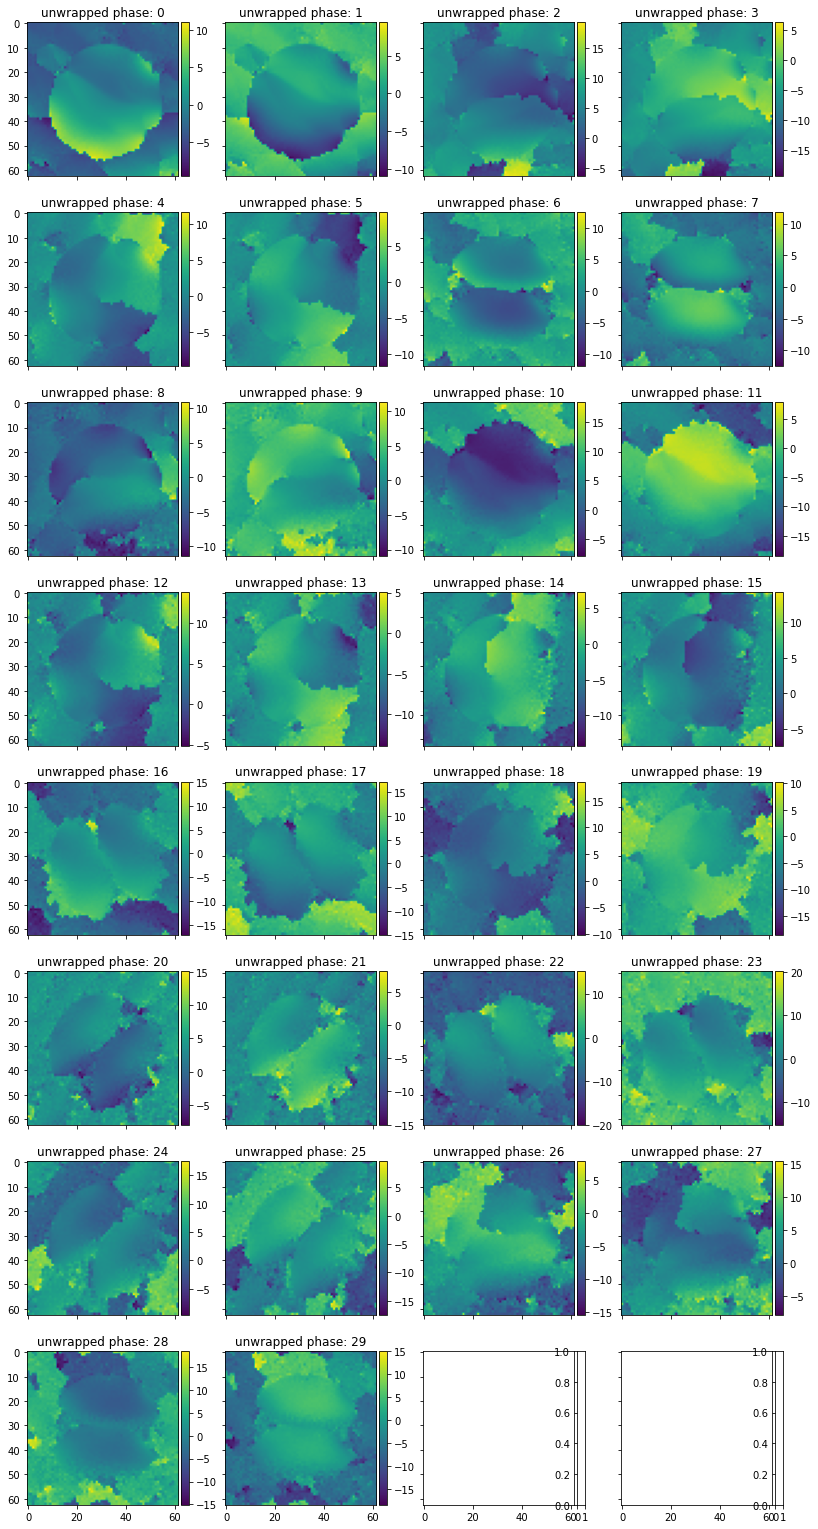

In [2]:
masks = np.load('masks.npy') 
phases = np.load('unwrap phases.npy')
pts_num = masks.shape[0]
row_num = int((pts_num+3)/int(4))
fig =plt.figure(1, figsize=(60, 60))
grid=AxesGrid(fig, 236, nrows_ncols=(row_num,4),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
for i in range(pts_num):
    im=grid[i].imshow(phases[i], cmap=plt.cm.viridis)
    grid.cbar_axes[i].colorbar(im)
    grid[i].set_title("unwrapped phase: " + str(i))

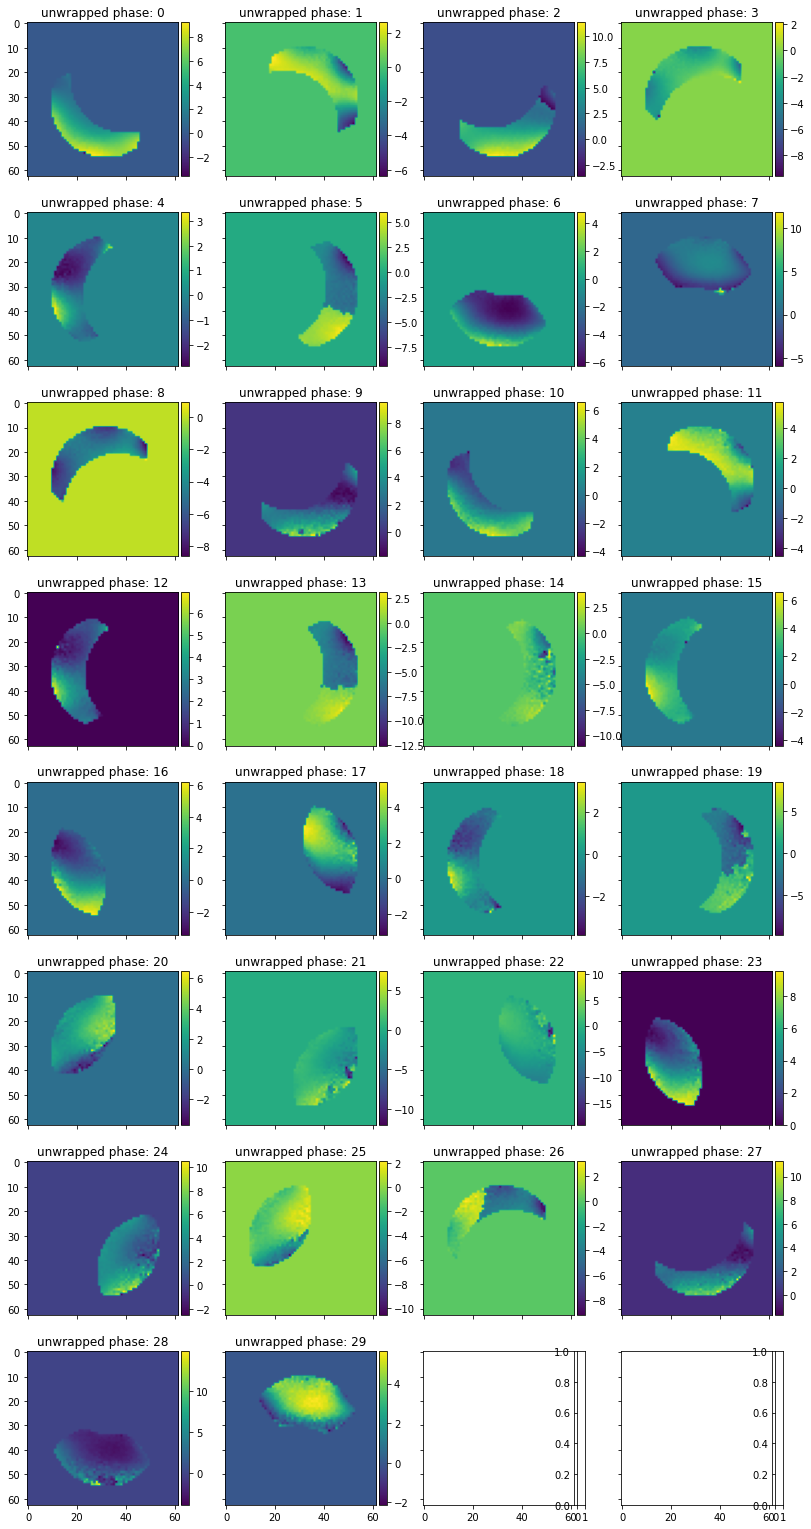

In [3]:
fig =plt.figure(1, figsize=(60, 60))
grid=AxesGrid(fig, 236, nrows_ncols=(row_num,4),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
for i in range(pts_num):
    im=grid[i].imshow(phases[i]*masks[i], cmap=plt.cm.viridis)
    grid.cbar_axes[i].colorbar(im)
    grid[i].set_title("unwrapped phase: " + str(i))

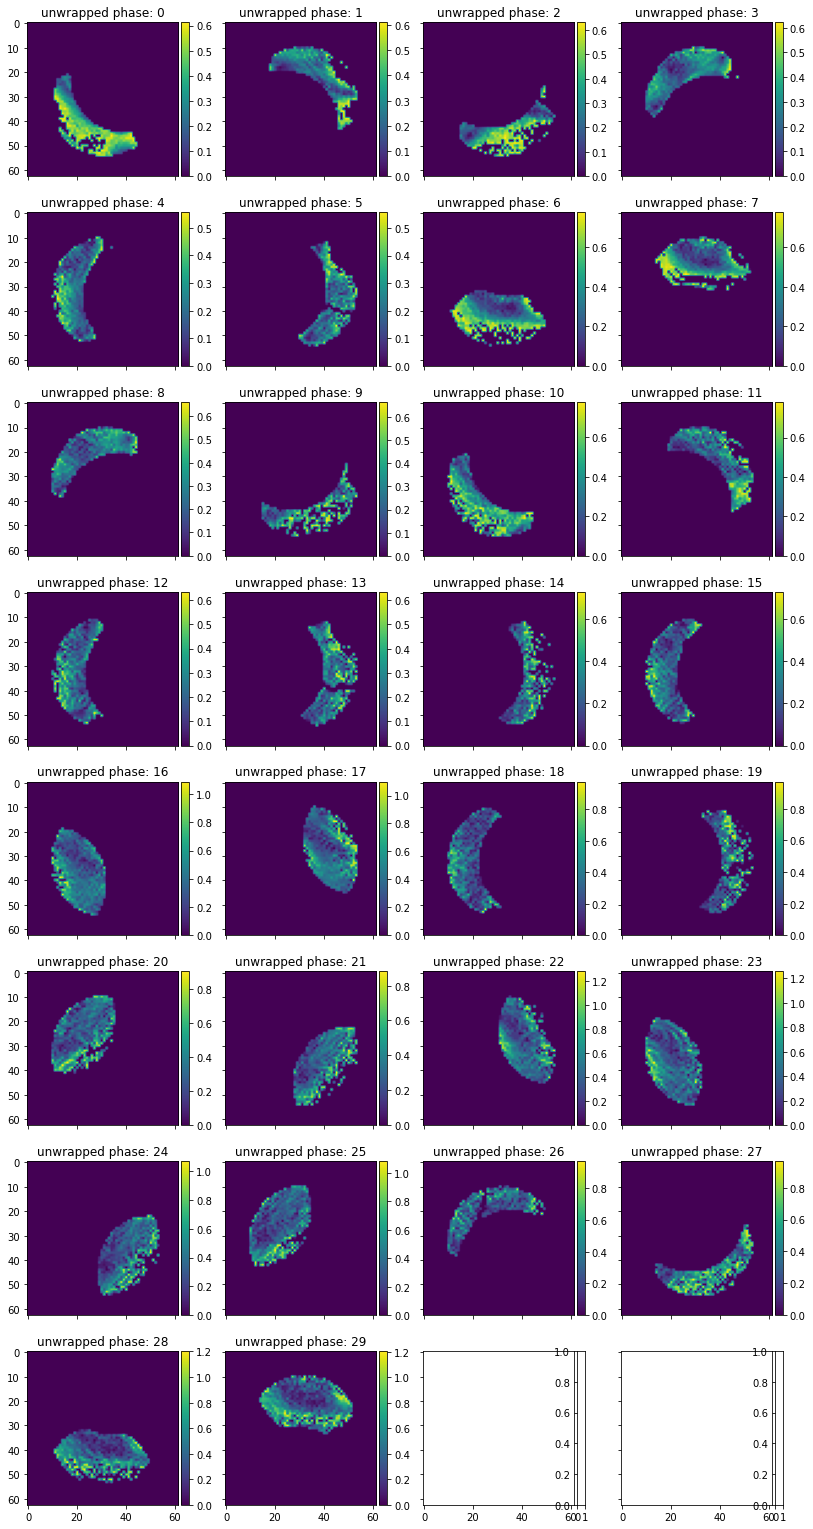

In [4]:
ol_grads = []
fig =plt.figure(1, figsize=(60, 60))
grid=AxesGrid(fig, 236, nrows_ncols=(row_num,4),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
for i in range(pts_num):
    grady, gradx = np.gradient(phases[i])
    grad=np.sqrt(np.square(gradx)+np.square(grady))
    grad_thres = np.average(grad)*0.8
    boundries = np.where(grad>grad_thres)
    grad[boundries] = 0
    ol_grads.append(grad*masks[i])
    im=grid[i].imshow(ol_grads[i], cmap=plt.cm.viridis)
    grid.cbar_axes[i].colorbar(im)
    grid[i].set_title("unwrapped phase: " + str(i))

In [5]:
def PickLargestRegion(grad):
    binary = np.zeros(grad.shape, dtype = np.int8)
    binary[np.where(grad>0)] = 1
    num_labels, labels_im = cv2.connectedComponents(binary)
    max_area = 0
    max_label = 0
    for i in range(num_labels-1):
        region_pix = np.where(labels_im == i+1)
        if(region_pix[0].shape[0]>max_area):
            max_area = region_pix[0].shape[0]
            max_label = i+1
    masked = np.zeros_like(grad)
    masked[np.where(labels_im == max_label)] = 1
    return masked

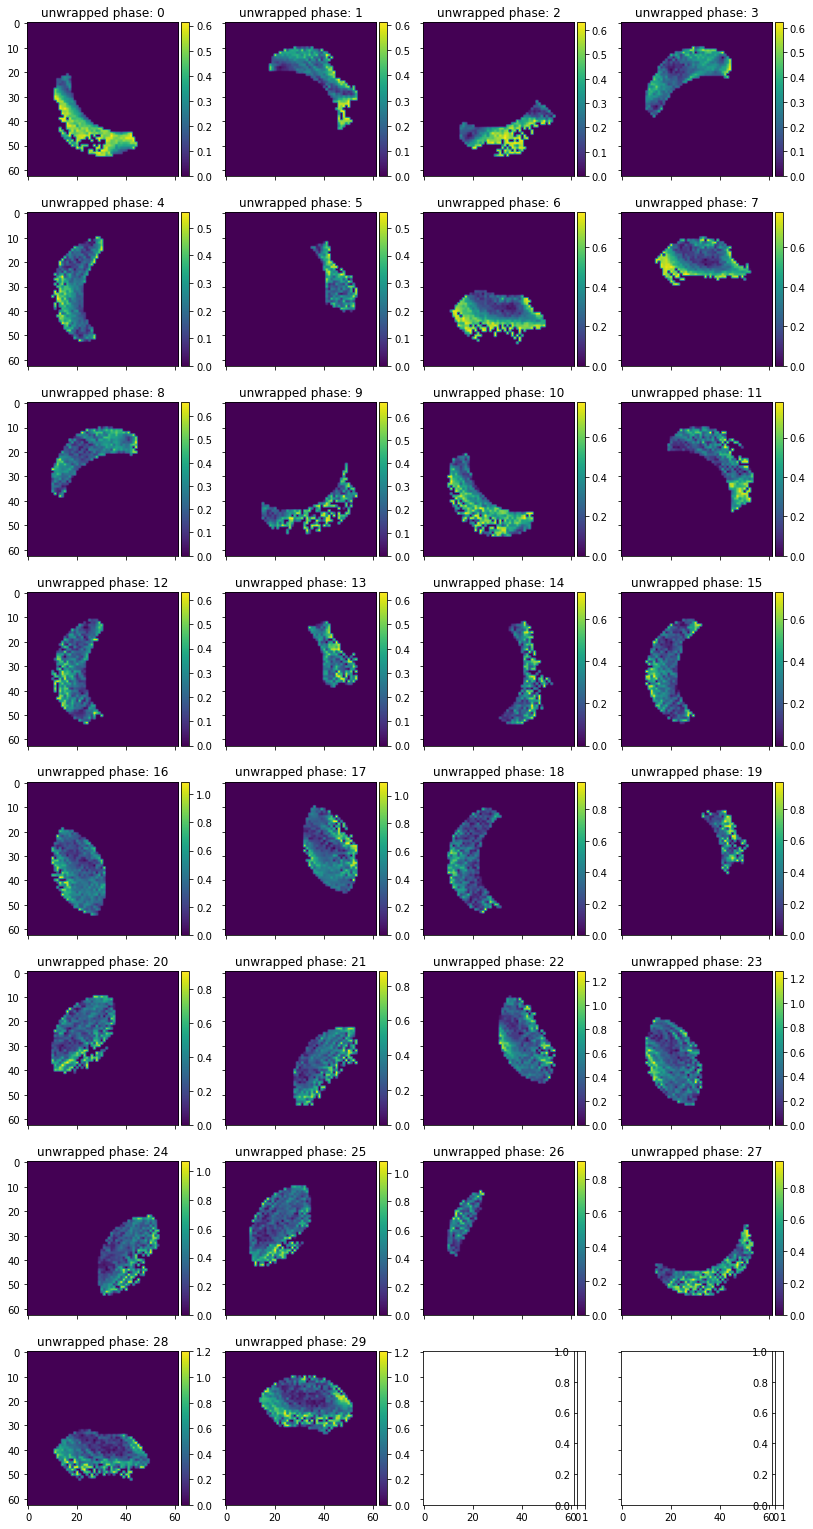

In [6]:
fig =plt.figure(1, figsize=(60, 60))
grid=AxesGrid(fig, 236, nrows_ncols=(row_num,4),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
for i in range(pts_num):
    masks[i] = PickLargestRegion(ol_grads[i])
    im=grid[i].imshow(masks[i]*ol_grads[i], cmap=plt.cm.viridis)
    grid.cbar_axes[i].colorbar(im)
    grid[i].set_title("unwrapped phase: " + str(i))

In [7]:
np.save("masks reduced.npy", masks)